# **AMERICAN UNIVERSITY OF ARMENIA**
## **College of Science and Engineering**

### **CS 260 Image Processing**
### **COURSE PROJECT – Handwriting Image Processing**


#### Project Objective
The course project is a part of a larger project that aims at predicting of student progress in CS and IT
disciplines based of their handwriting samples [1]. It is expected to apply in its framework several Image
Processing methods to identify and extract graphical features that could be used in the subsequent studies.
Several Project stages are outlined below. After Stage 0, the stages can be addressed and implemented in an
arbitrary order. Depending on the progress, additional or modified stages may also be posted. You are
welcome to import and use OCR methods after proper acknowledgement and brief description.

#### Stage 1 – eliminate the printed text

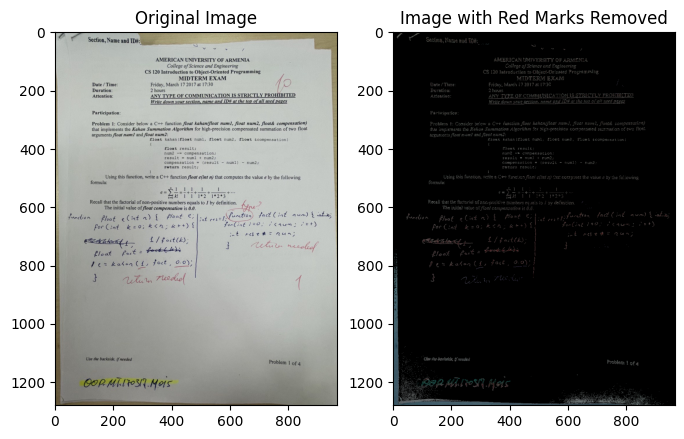

True

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

# Read the image
img = cv2.imread('./pictures/1.jpg')

# Convert BGR to RGB for plotting with matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Calculate histogram for each channel
hist_b = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([img], [1], None, [256], [0, 256])
hist_r = cv2.calcHist([img], [2], None, [256], [0, 256])



# Identify and remove red regions based on histogram analysis
red_threshold = 120  # Adjust as needed
img_no_red = img.copy()
img_no_red[img[:, :, 2] > red_threshold] = [0, 0, 0]

# Display the original image
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

# Display the image with red marks removed
plt.subplot(1, 2, 2)
plt.imshow(img_no_red)
plt.title('Image with Red Marks Removed')

plt.show()


output_folder = 'output/1'
os.makedirs(output_folder, exist_ok=True)
output_path = os.path.join(output_folder, '1-no-red.jpg')
cv2.imwrite(output_path, img_no_red)

After this most of the red marks were removed from the original image, leaving only the student's handwriting 

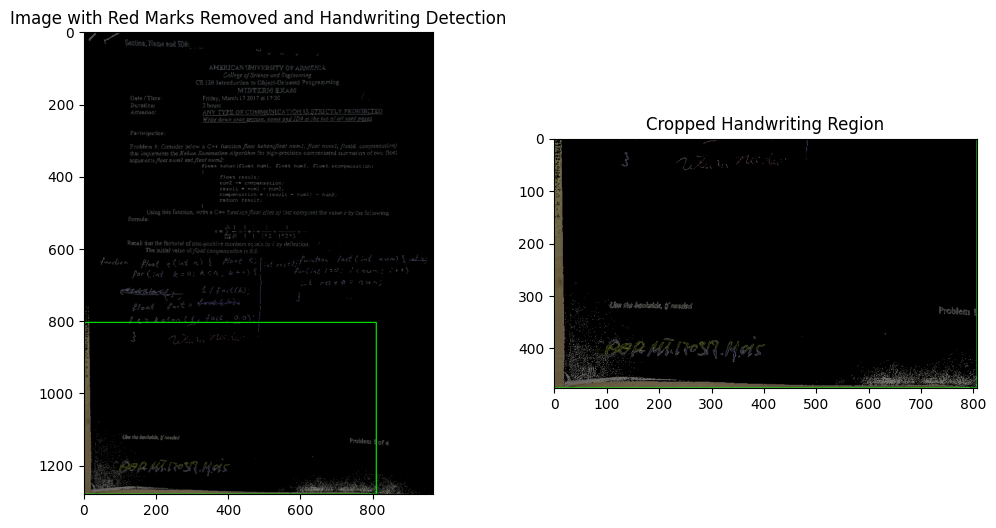

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

# Convert the image with red removed to grayscale
gray_img = cv2.cvtColor(img_no_red, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to create a binary image
_, binary_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours based on area (you might need to adjust the area threshold)
valid_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 1000]

# Draw rectangles around the valid contours (handwriting)
for cnt in valid_contours:
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(img_no_red, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Crop the region where handwriting is detected
if valid_contours:
    x, y, w, h = cv2.boundingRect(valid_contours[0])
    cropped_region = img_no_red[y:y + h, x:x + w]

    # Save the cropped handwriting region in the output folder
    output_folder = 'output'
    os.makedirs(output_folder, exist_ok=True)
    output_path_cropped = os.path.join(output_folder, 'handwriting_cropped.jpg')
    cv2.imwrite(output_path_cropped, cropped_region)

    # Display the result with rectangles and the cropped handwriting region
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img_no_red, cv2.COLOR_BGR2RGB))
    plt.title('Image with Red Marks Removed and Handwriting Detection')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(cropped_region, cv2.COLOR_BGR2RGB))
    plt.title('Cropped Handwriting Region')

    plt.show()
else:
    print("No handwriting found in the specified HSV range.")


Here the algorithm detection is not working well, it's detecting again the part that includes yellowish particles as it did in the below example with the original image.

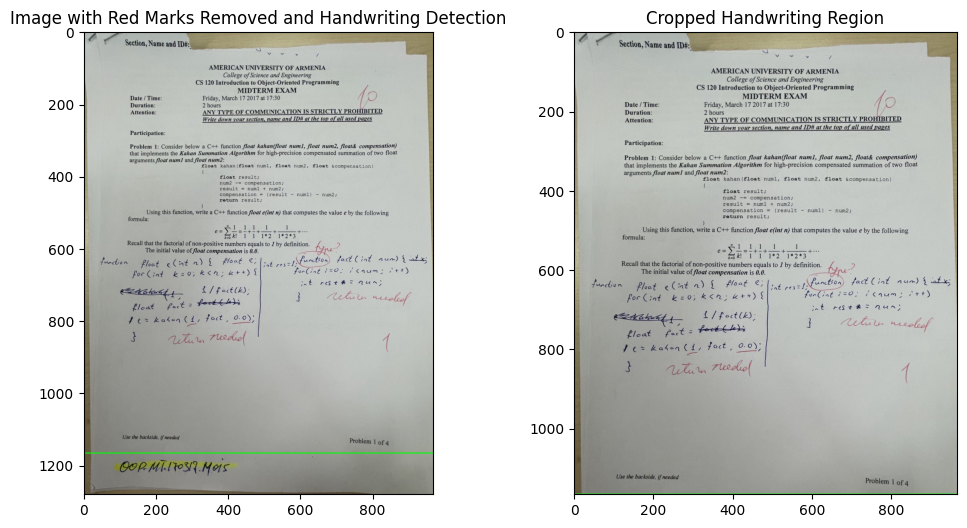

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

# Convert the image with red removed to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to create a binary image
_, binary_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours based on area (you might need to adjust the area threshold)
valid_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 1000]

# Draw rectangles around the valid contours (handwriting)
for cnt in valid_contours:
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Crop the region where handwriting is detected
if valid_contours:
    x, y, w, h = cv2.boundingRect(valid_contours[0])
    cropped_region = img[y:y + h, x:x + w]

    # Save the cropped handwriting region in the output folder
    output_folder = 'output'
    os.makedirs(output_folder, exist_ok=True)
    output_path_cropped = os.path.join(output_folder, 'handwriting_cropped.jpg')
    cv2.imwrite(output_path_cropped, cropped_region)

    # Display the result with rectangles and the cropped handwriting region
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Image with Red Marks Removed and Handwriting Detection')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(cropped_region, cv2.COLOR_BGR2RGB))
    plt.title('Cropped Handwriting Region')

    plt.show()
else:
    print("No handwriting found in the specified HSV range.")


The code detecting the channels corresponding to the yellow, so we get rid of the part that we do not need, but printed text still remains

#### Stage 2 - evaluate page features


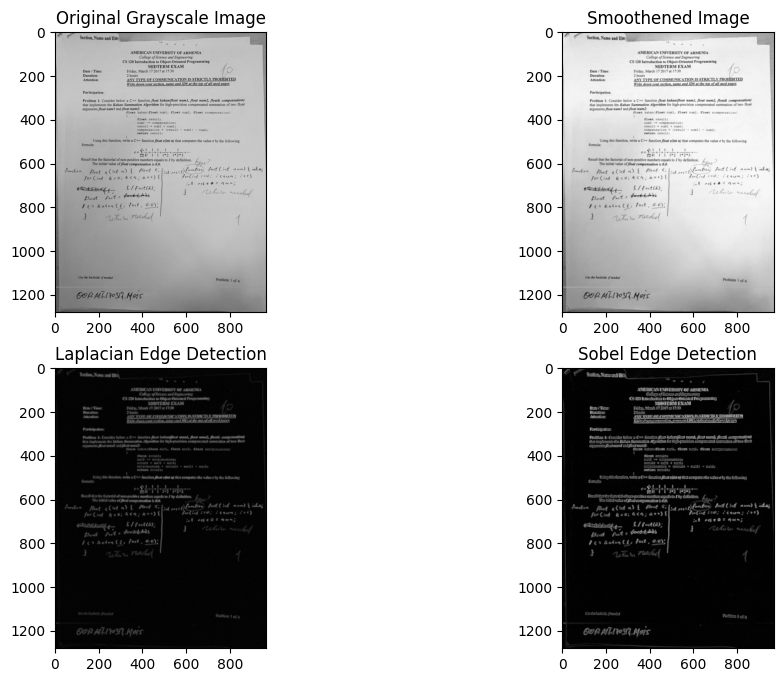

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur for smoothening
blurred_img = cv2.GaussianBlur(gray_img, (5, 5), 0)

# Apply Laplacian filter for edge detection
edges = cv2.Laplacian(blurred_img, cv2.CV_64F)
edges = np.uint8(np.absolute(edges))

# Apply Sobel filter for additional edge detection
sobel_x = cv2.Sobel(blurred_img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(blurred_img, cv2.CV_64F, 0, 1, ksize=3)

sobel_combined = cv2.magnitude(sobel_x, sobel_y)
sobel_combined = np.uint8(255 * sobel_combined / np.max(sobel_combined))

# Display the images
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(gray_img, cv2.COLOR_BGR2RGB), cmap='gray')
plt.title('Original Grayscale Image')

plt.subplot(2, 2, 2)
plt.imshow(blurred_img, cmap='gray')
plt.title('Smoothened Image')

plt.subplot(2, 2, 3)
plt.imshow(edges, cmap='gray')
plt.title('Laplacian Edge Detection')

plt.subplot(2, 2, 4)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Edge Detection')

plt.show()


This code applies Gaussian blur for smoothening and Laplacian/Sobel filters for edge detection.



#### Stage 3 – straight lines in handwriting samples

Detected line: Rho = 806.0, Theta = 1.5707963705062866
Detected line: Rho = 802.0, Theta = 1.5707963705062866
Detected line: Rho = 809.0, Theta = 0.0
Detected line: Rho = 805.0, Theta = 0.0
Detected line: Rho = 2.0, Theta = 0.0
Detected line: Rho = 340.0, Theta = 1.5707963705062866
Detected line: Rho = 332.0, Theta = 1.5707963705062866
Detected line: Rho = 320.0, Theta = 1.5707963705062866
Detected line: Rho = 345.0, Theta = 1.5533430576324463
Detected line: Rho = 1264.0, Theta = 1.5882495641708374
Detected line: Rho = 326.0, Theta = 1.5533430576324463
Detected line: Rho = 1.0, Theta = 3.1241393089294434
Detected line: Rho = 337.0, Theta = 1.5707963705062866
Detected line: Rho = 1267.0, Theta = 1.5707963705062866
Detected line: Rho = 335.0, Theta = 1.5707963705062866
Detected line: Rho = 504.0, Theta = 1.5707963705062866
Detected line: Rho = 314.0, Theta = 1.5707963705062866
Detected line: Rho = 316.0, Theta = 1.5707963705062866
Detected line: Rho = 343.0, Theta = 1.5533430576324463
De

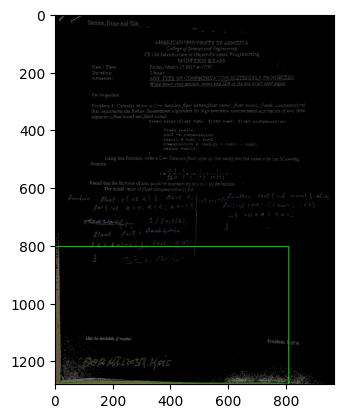

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def hough_transform(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise and improve Hough Transform
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply Canny edge detection
    edges = cv2.Canny(blurred, 50, 150)

    # Use Hough Transform to detect lines
    lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold=100)

    return lines

def interpret_lines(lines):
    # Interpret and analyze the detected lines
    # You can implement logic to calculate baseline, slant, spacing, character size, etc.
    # For simplicity, this example prints the detected lines

    for line in lines:
        rho, theta = line[0]
        print(f"Detected line: Rho = {rho}, Theta = {theta}")

# Load the cropped binary handwriting sample
image = img_no_red

# Apply Hough Transform
lines = hough_transform(image)

# Interpret the detected lines
interpret_lines(lines)

# Visualize the results (optional)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)
plt.show()


Rho (rho): The distance from the origin to the closest point on the line (perpendicular distance). It is measured in pixels.

Theta (theta): The angle between the x-axis and the normal to the line. It is measured in radians.

The lines are represented in polar coordinates (rho, theta), and these parameters describe the mathematical representation of each detected line. 

#### Stage 4 – binary regions in handwriting samples

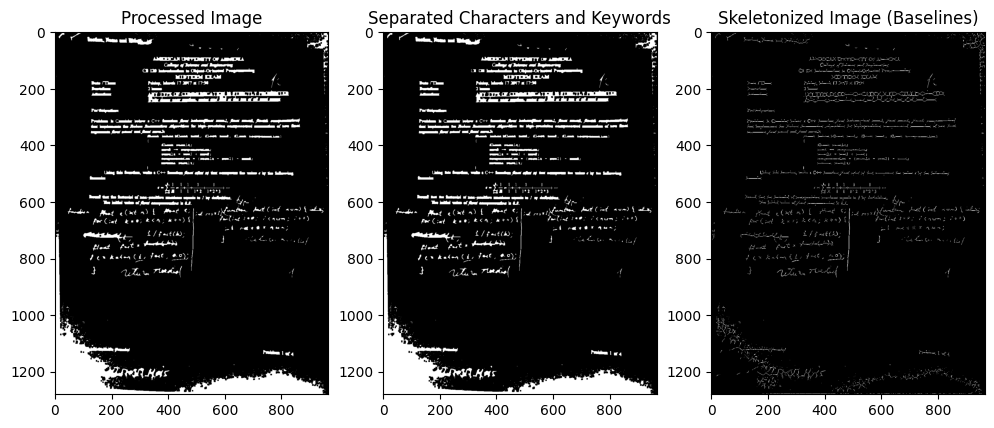

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    # Read the image
    img = cv2.imread(image_path)

    # Check if the image is loaded successfully
    if img is None:
        raise ValueError(f"Error: Unable to load image at {image_path}")

    # Convert the image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to create a binary image
    _, binary_img = cv2.threshold(gray_img, 128, 255, cv2.THRESH_BINARY_INV)

    # Apply morphological operations (dilation and erosion) to enhance regions
    kernel = np.ones((5, 5), np.uint8)
    processed_img = cv2.morphologyEx(binary_img, cv2.MORPH_CLOSE, kernel)

    return processed_img

def separate_characters_and_keywords(image):
    # Find contours in the processed image
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Iterate through contours and separate characters, keywords, etc.
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)

        # Example: You can categorize contours based on their aspect ratio or area
        aspect_ratio = w / h
        area = cv2.contourArea(contour)

        # Adjust the conditions based on your specific requirements
        if 0.5 < aspect_ratio < 2.0 and 100 < area < 5000:
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    return image

def skeletonize_image(image):
    # Apply skeletonization to detect baselines
    size = np.size(image)
    skel = np.zeros(image.shape, np.uint8)

    ret, img = cv2.threshold(image, 128, 255, 0)
    element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
    done = False

    while not done:
        eroded = cv2.erode(img, element)
        temp = cv2.dilate(eroded, element)
        temp = cv2.subtract(img, temp)
        skel = cv2.bitwise_or(skel, temp)
        img = eroded.copy()

        zeros = size - cv2.countNonZero(img)
        if zeros == size:
            done = True

    return skel

# Example usage
image_path = './pictures/1.jpg'

try:
    processed_image = preprocess_image(image_path)

    # Separate characters and keywords
    separated_image = separate_characters_and_keywords(processed_image.copy())

    # Skeletonize the image
    skeleton_image = skeletonize_image(processed_image.copy())

    # Display the results
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.imshow(processed_image, cmap='gray')
    plt.title('Processed Image')

    plt.subplot(1, 3, 2)
    plt.imshow(separated_image, cmap='gray')
    plt.title('Separated Characters and Keywords')

    plt.subplot(1, 3, 3)
    plt.imshow(skeleton_image, cmap='gray')
    plt.title('Skeletonized Image (Baselines)')

    plt.show()

except ValueError as e:
    print(e)
    # Handle the error, e.g., show an error message or terminate the program


 it, separates characters and keywords based on contours, and skeletonizes the image to detect baselines. 

#### Stage 5 – labeled features of specific characters

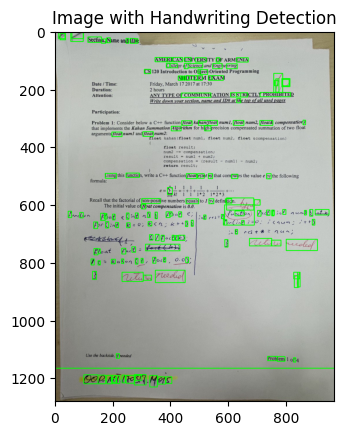

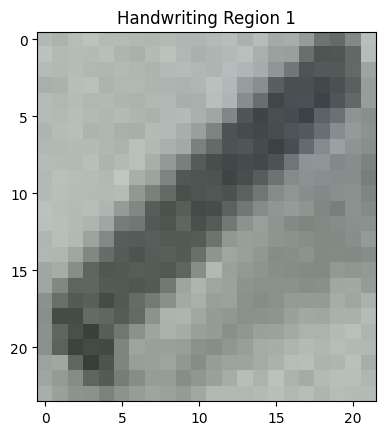

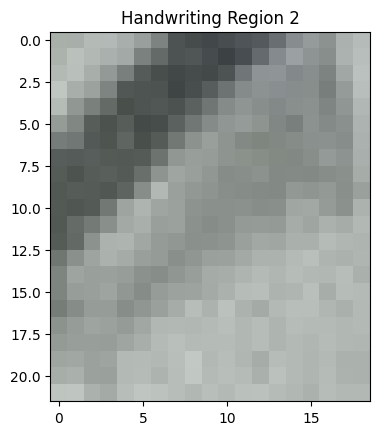

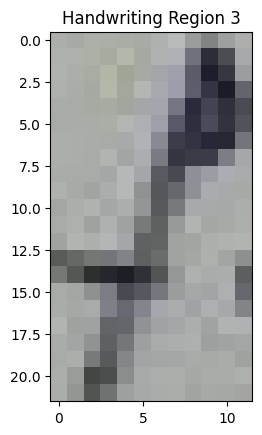

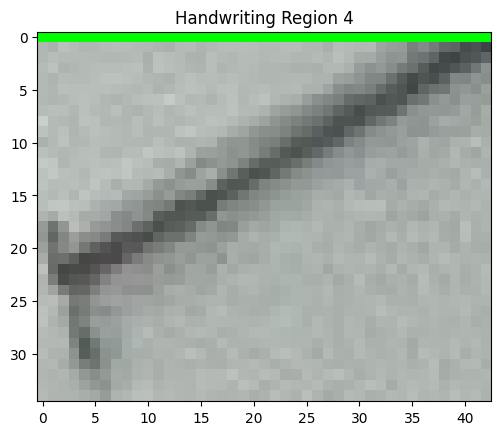

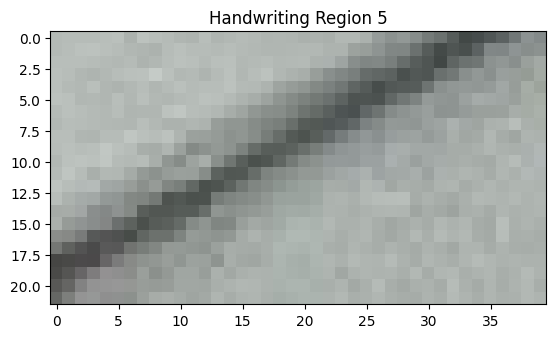

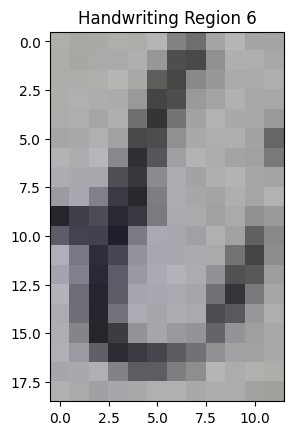

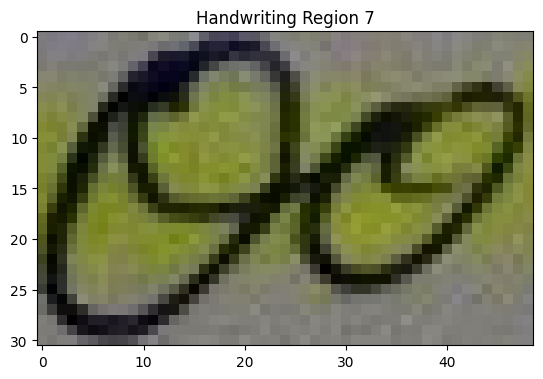

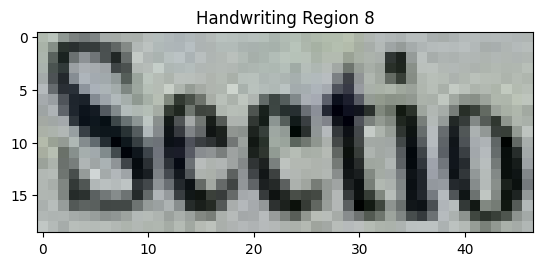

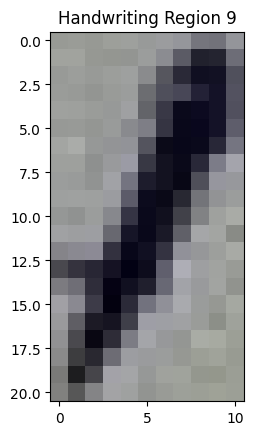

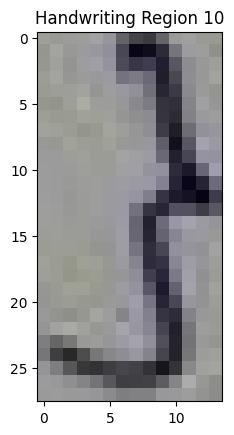

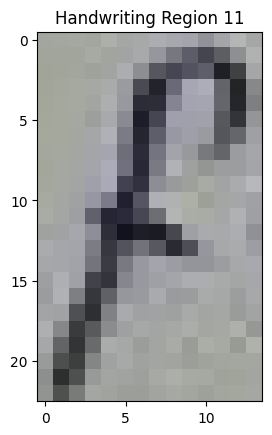

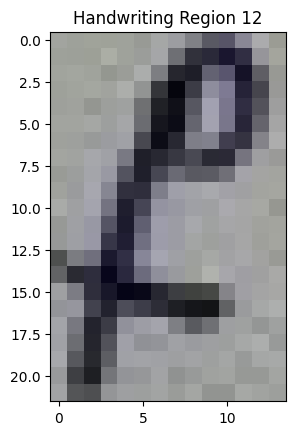

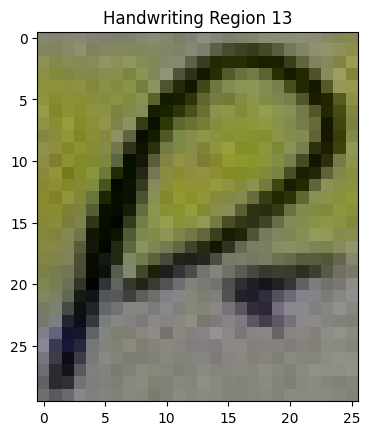

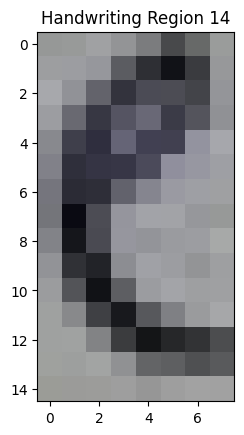

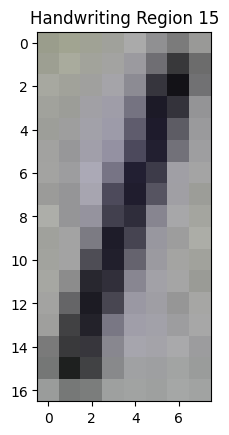

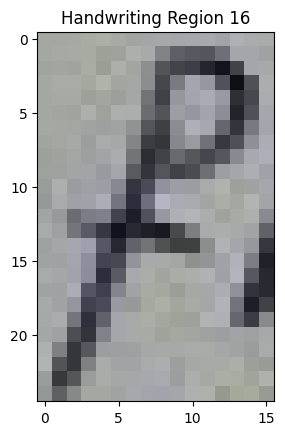

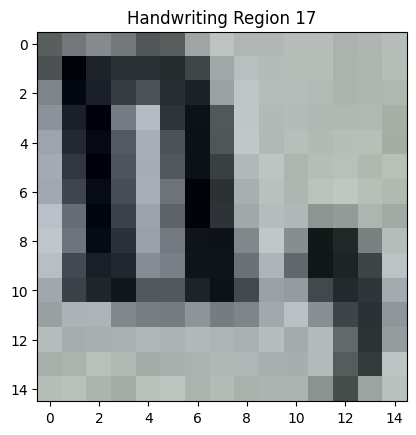

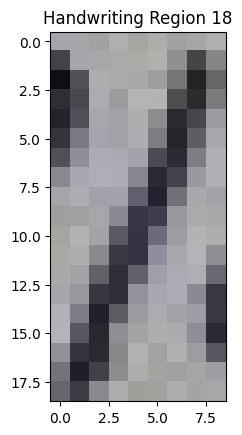

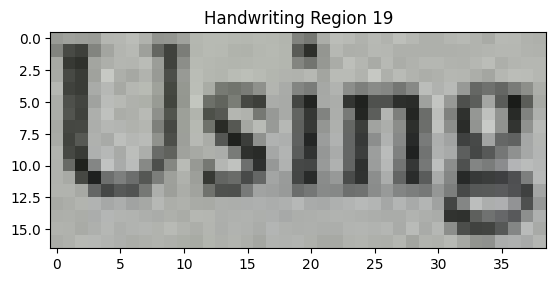

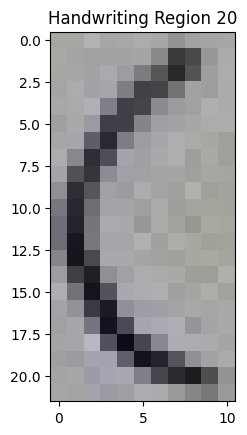

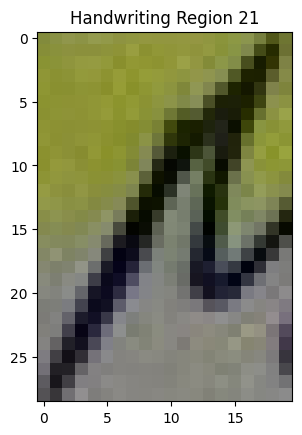

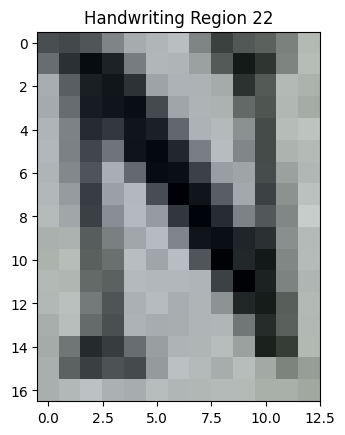

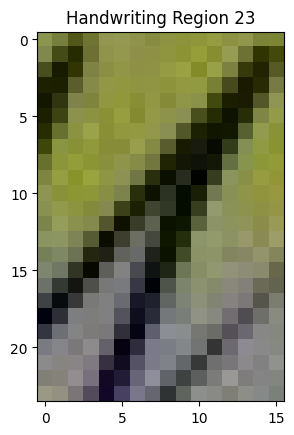

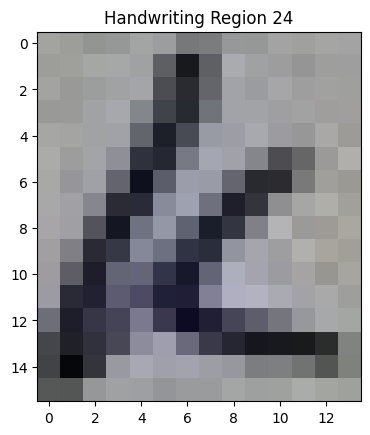

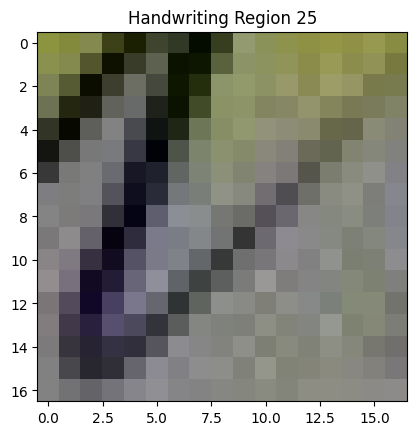

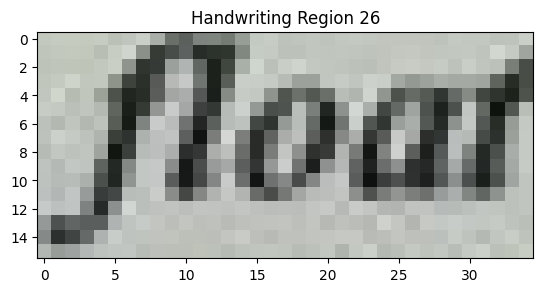

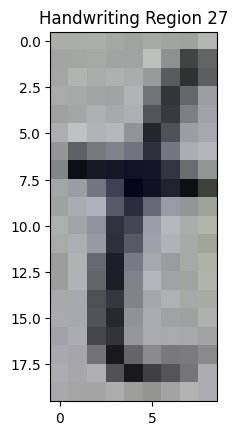

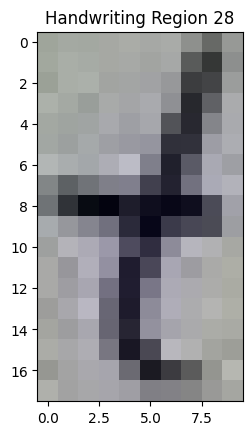

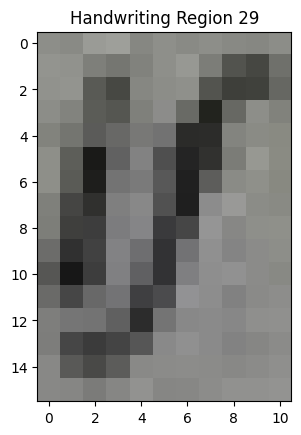

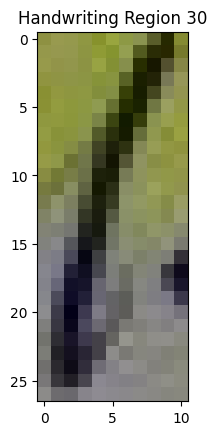

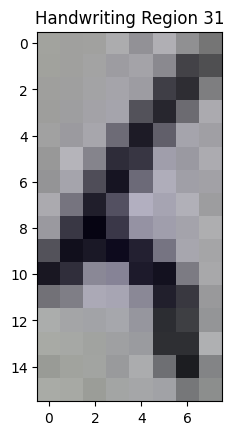

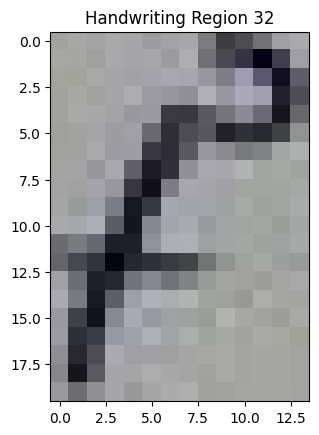

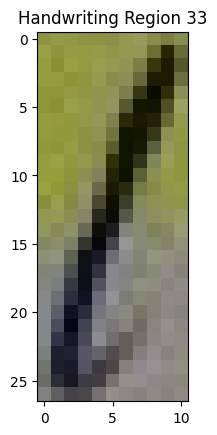

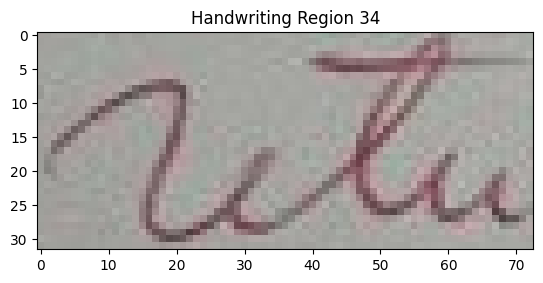

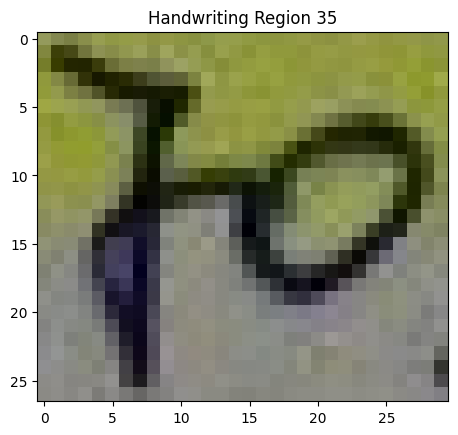

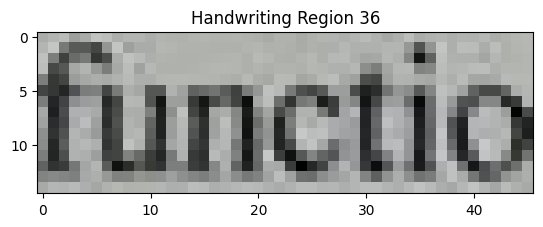

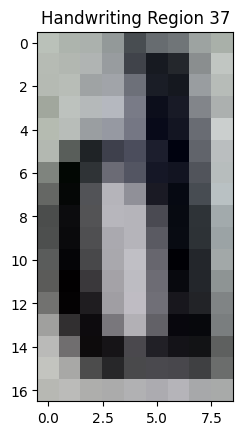

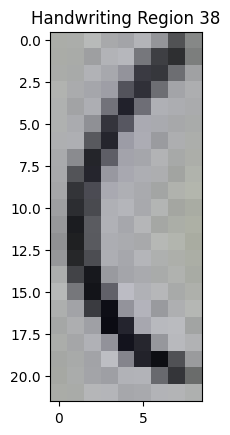

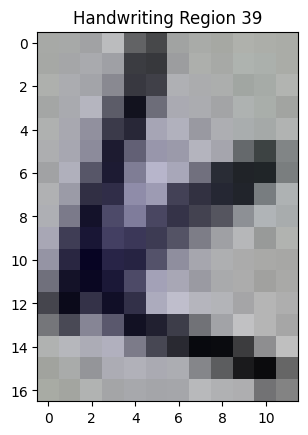

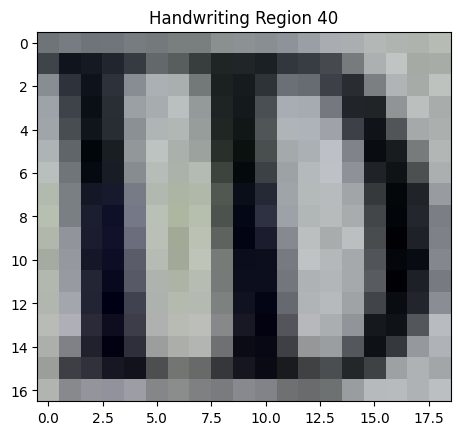

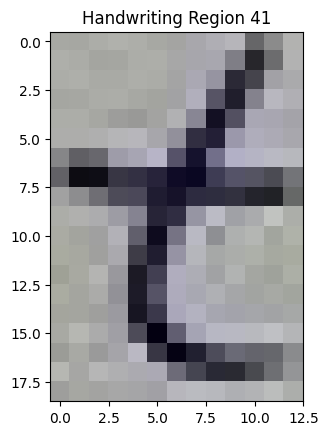

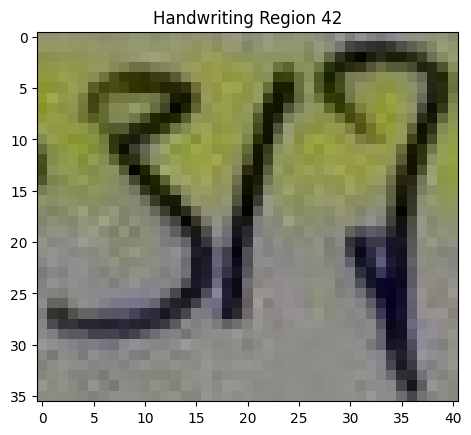

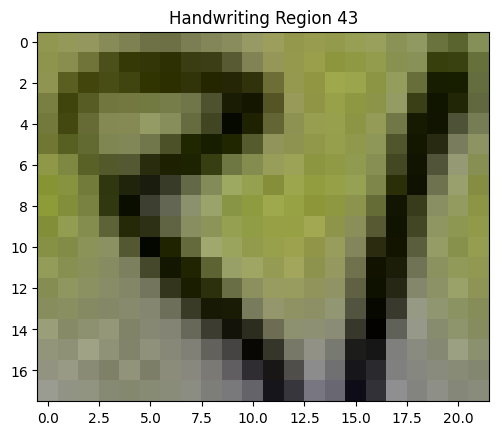

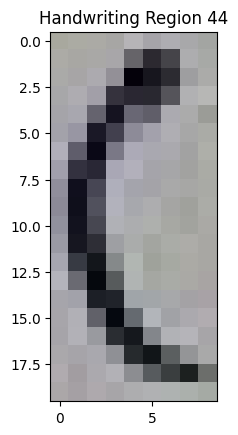

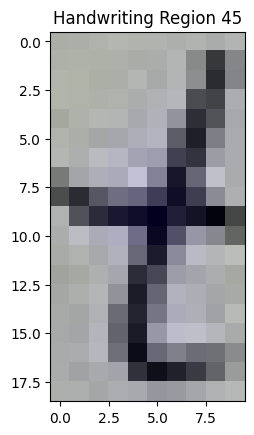

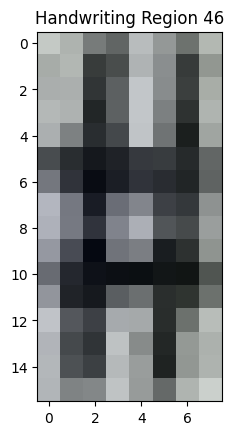

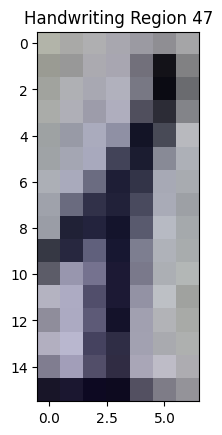

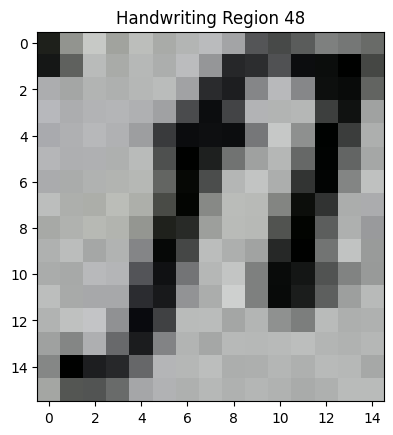

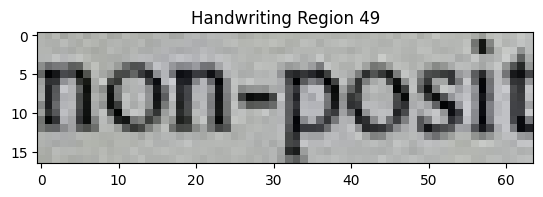

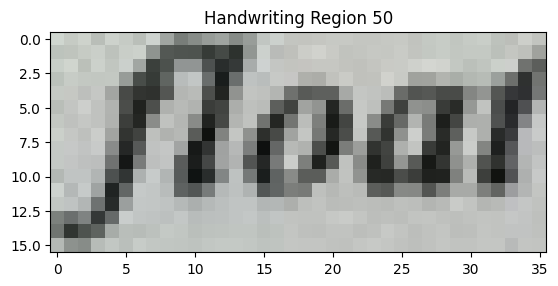

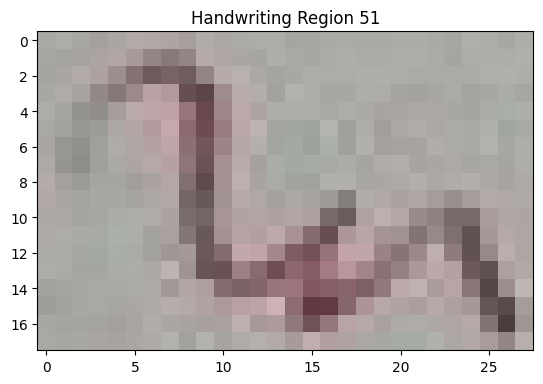

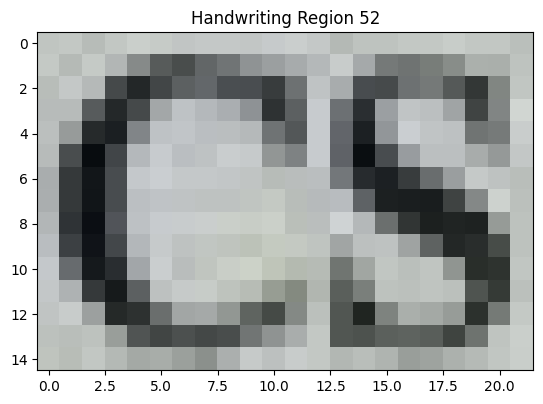

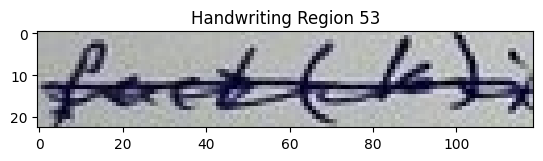

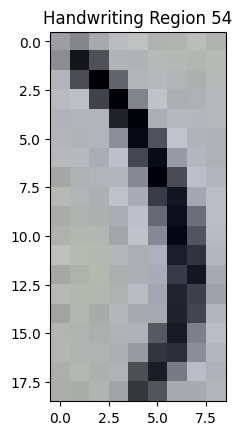

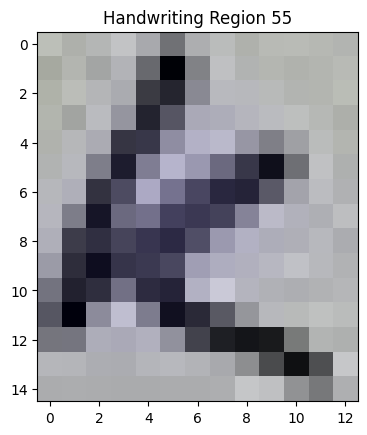

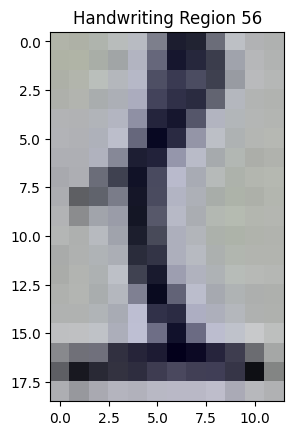

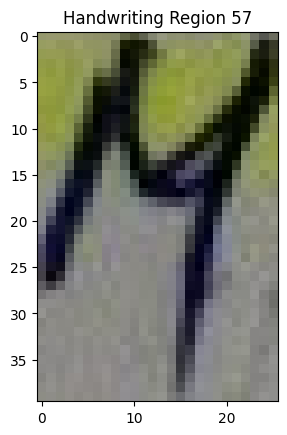

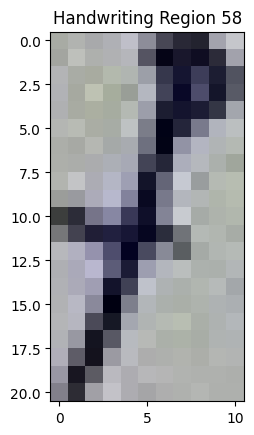

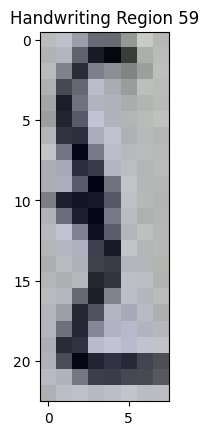

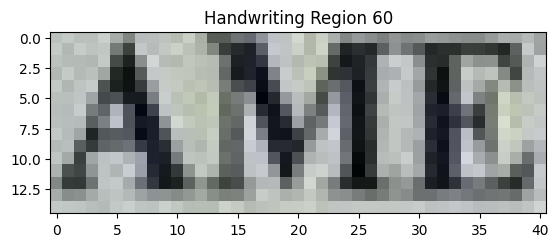

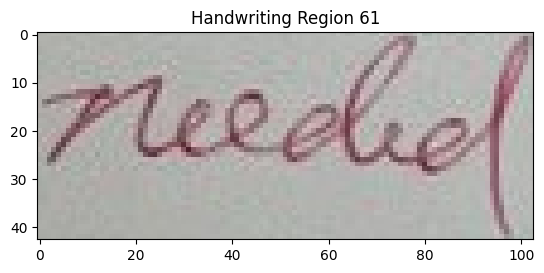

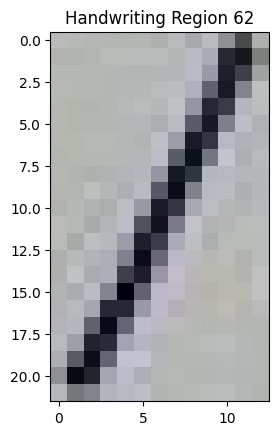

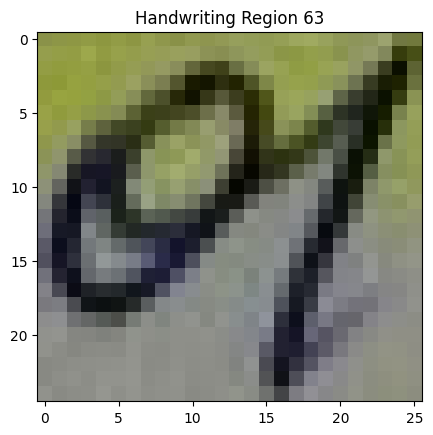

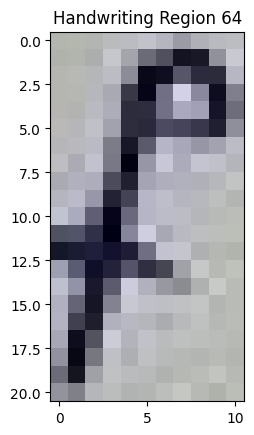

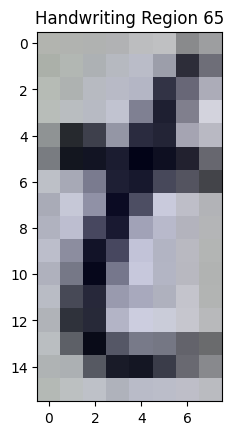

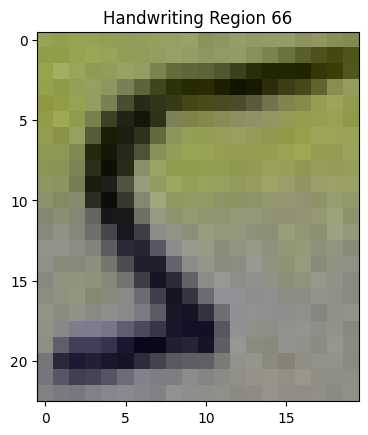

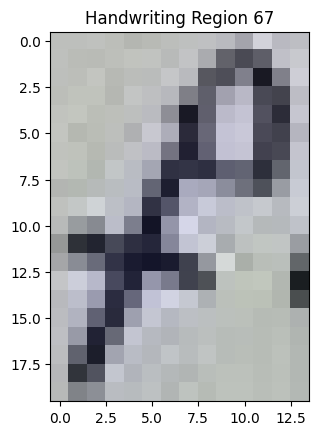

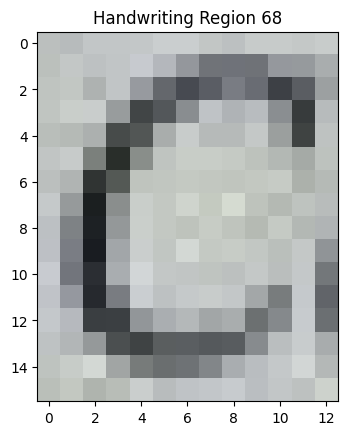

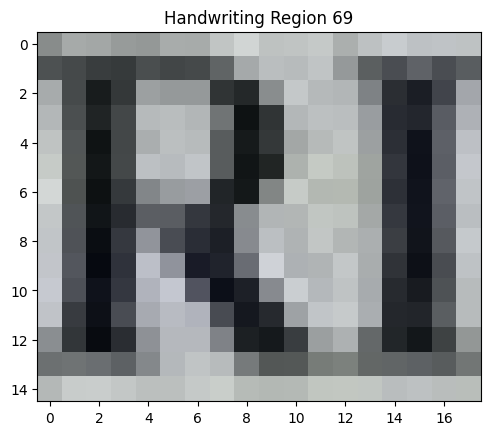

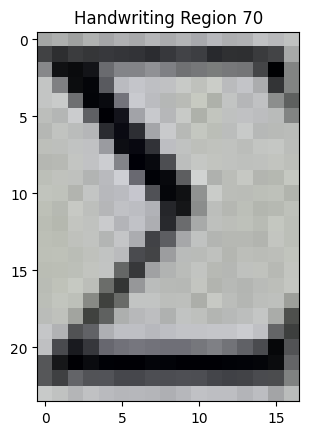

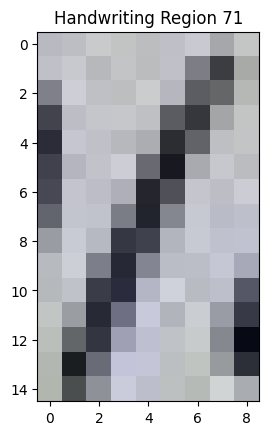

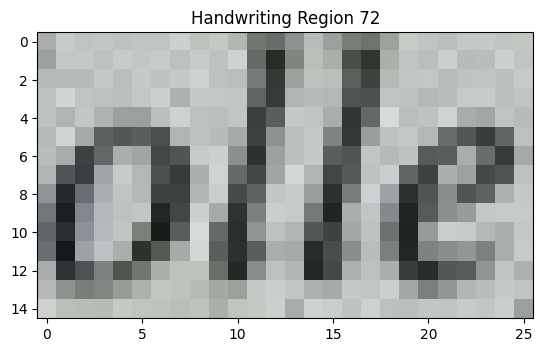

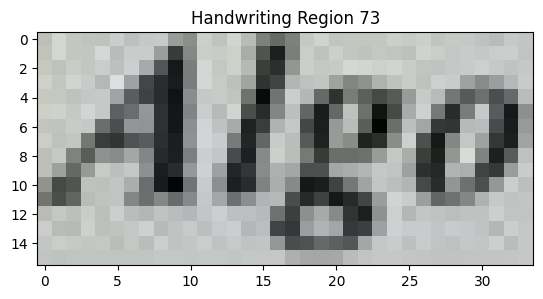

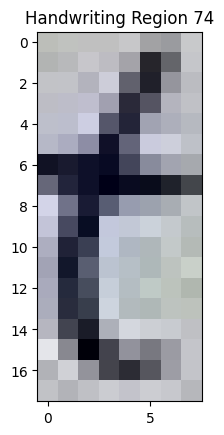

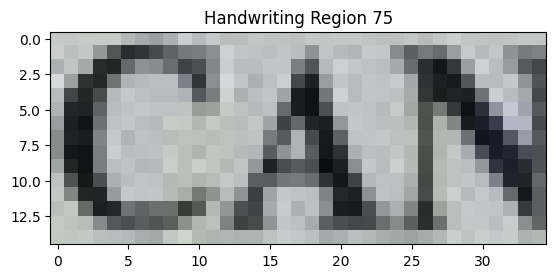

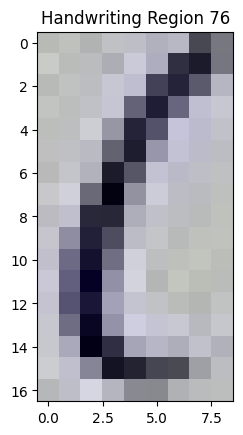

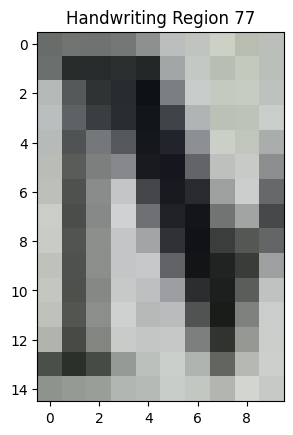

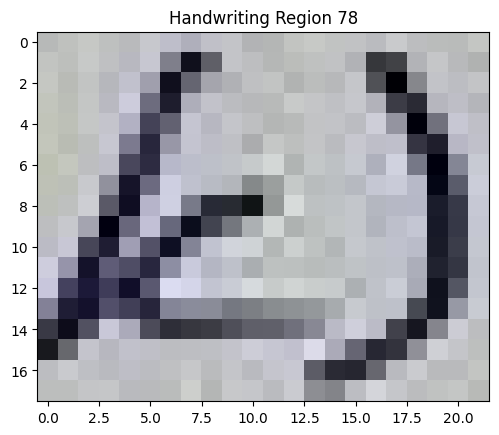

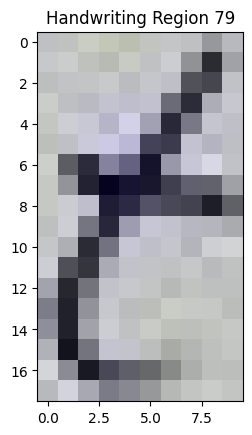

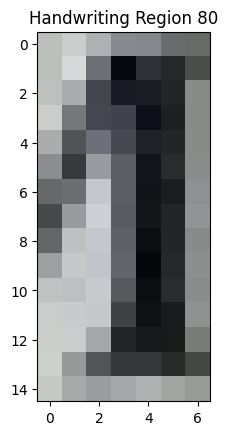

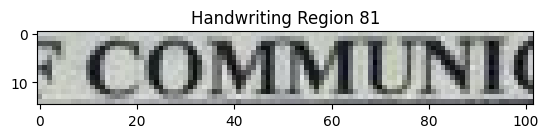

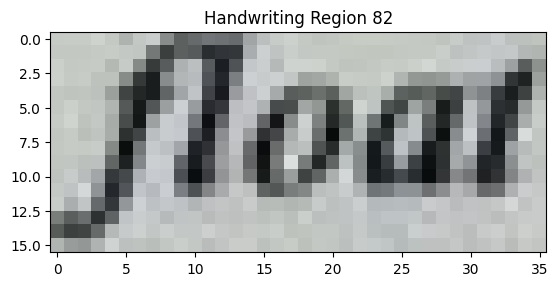

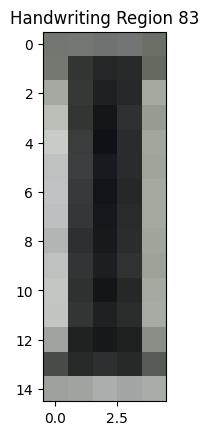

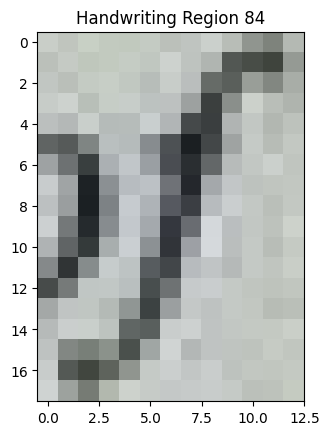

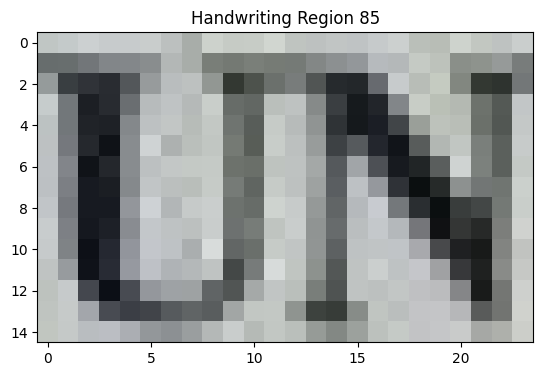

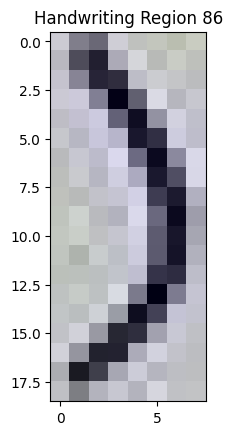

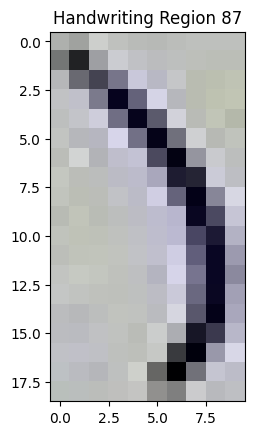

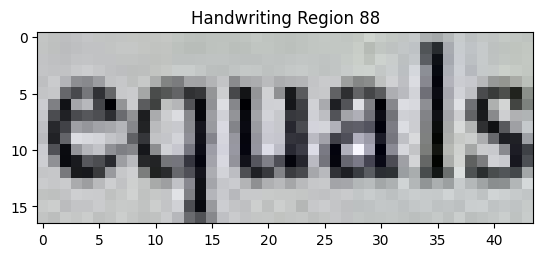

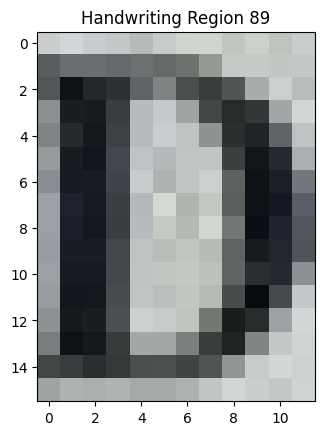

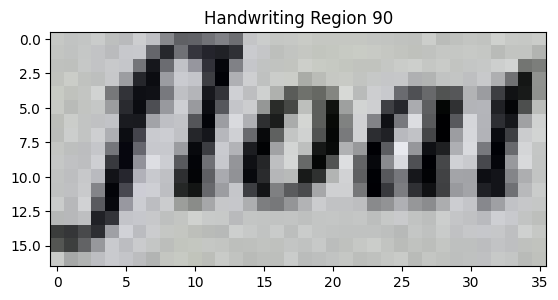

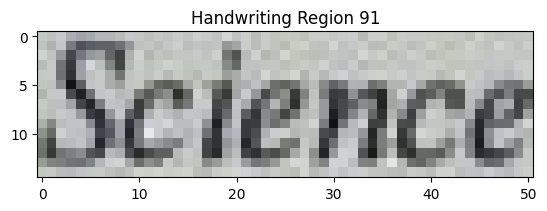

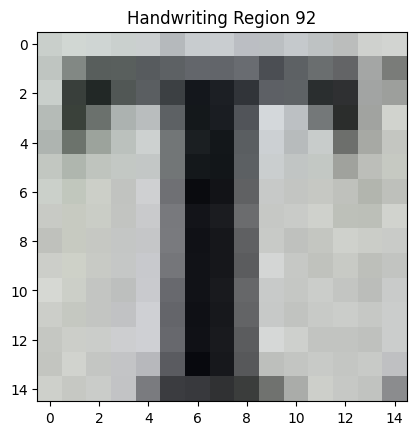

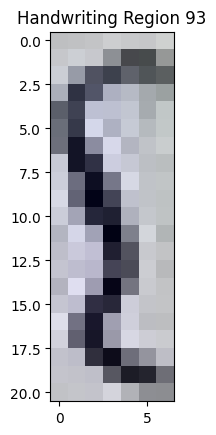

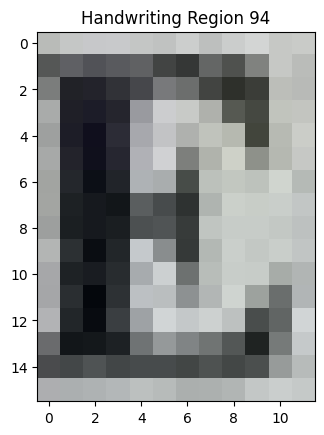

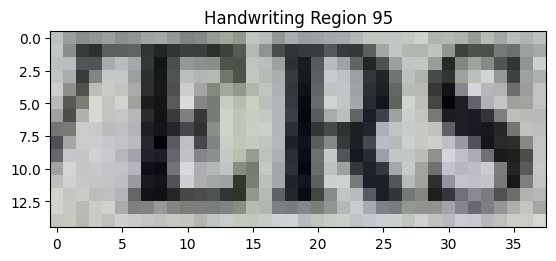

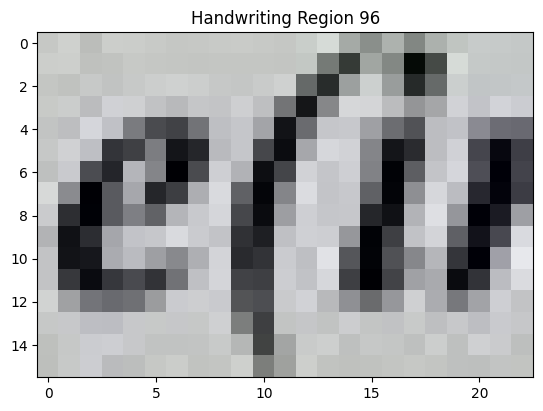

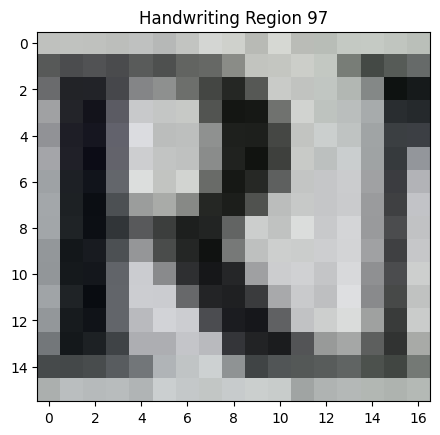

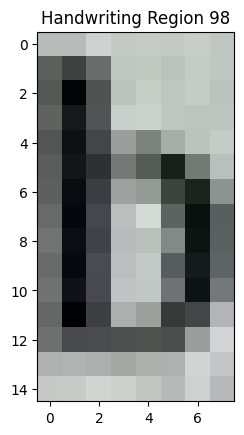

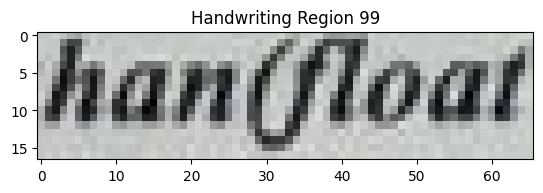

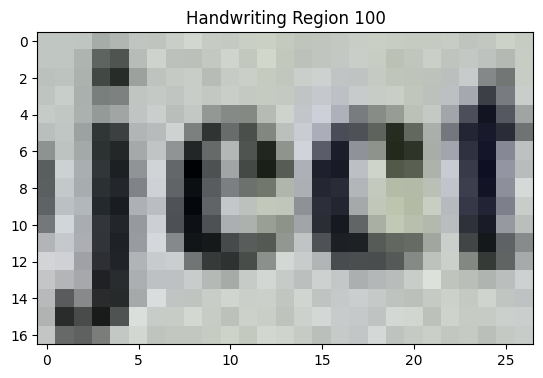

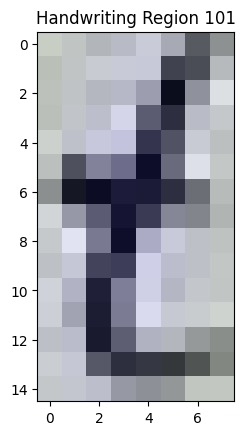

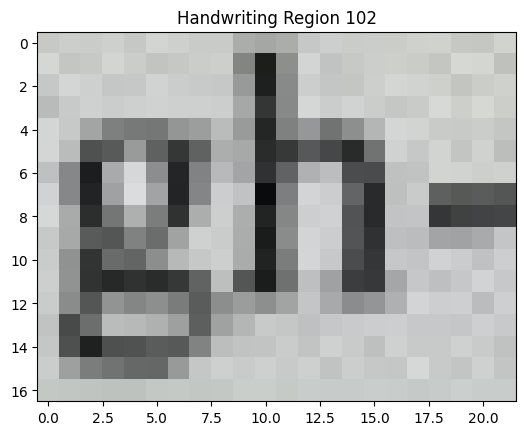

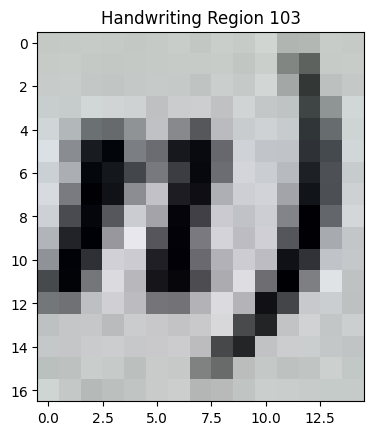

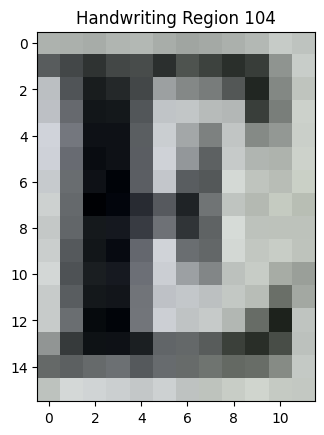

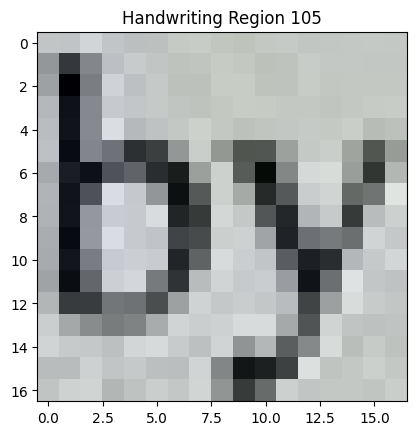

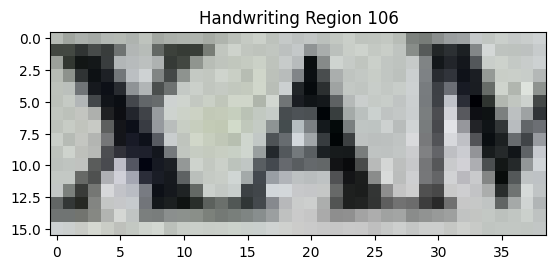

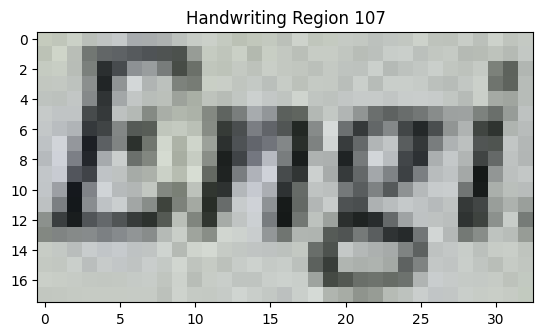

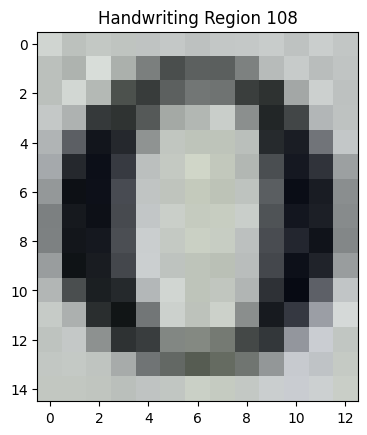

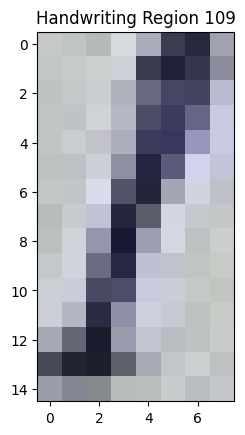

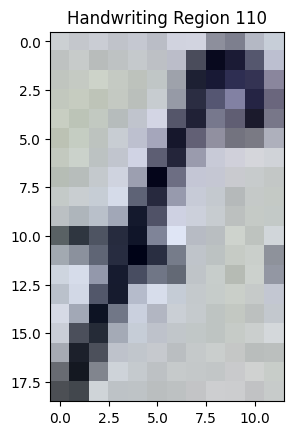

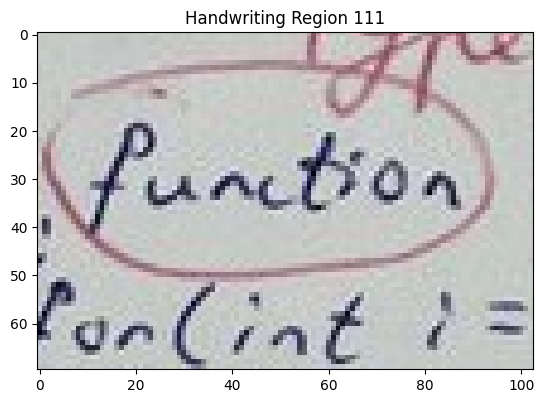

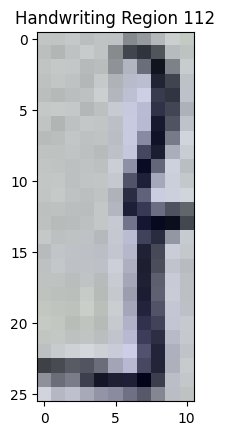

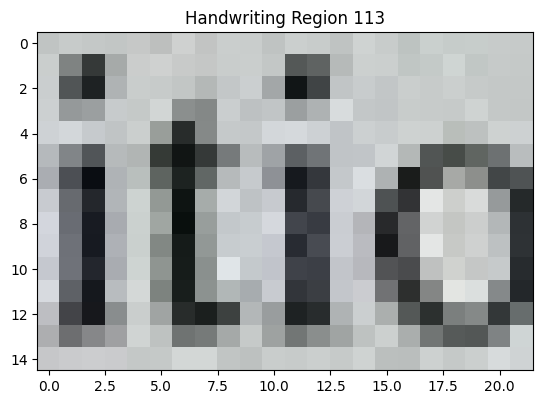

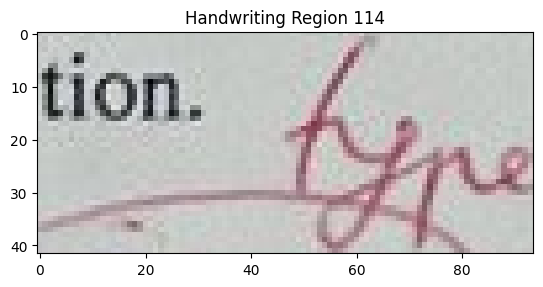

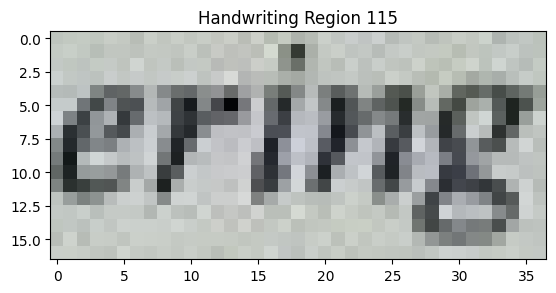

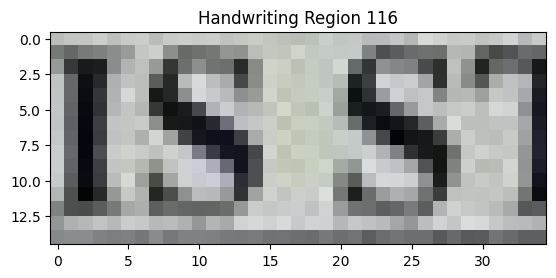

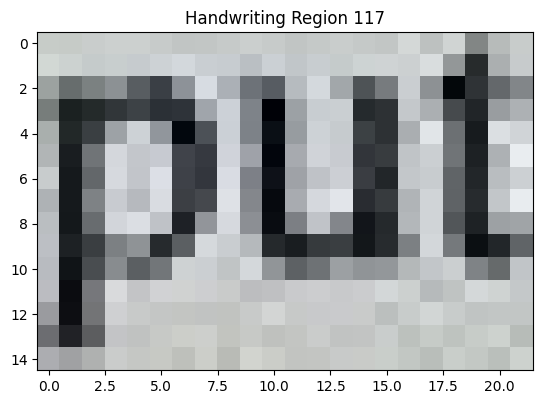

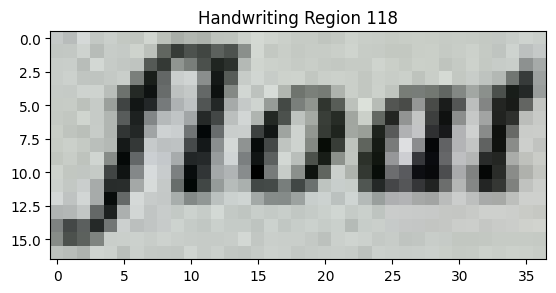

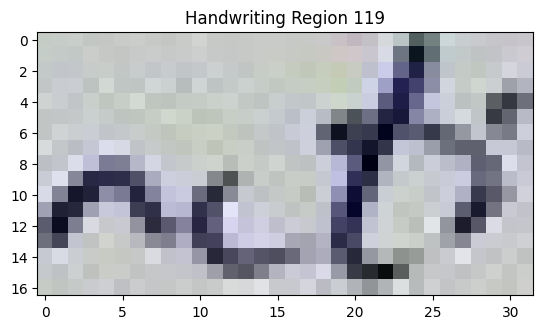

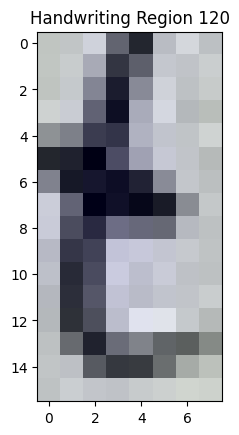

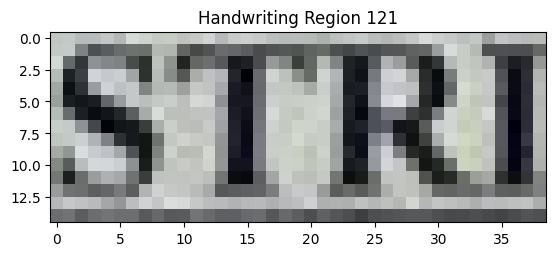

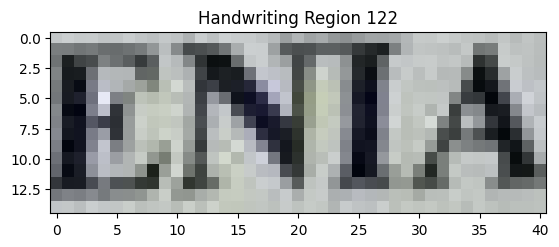

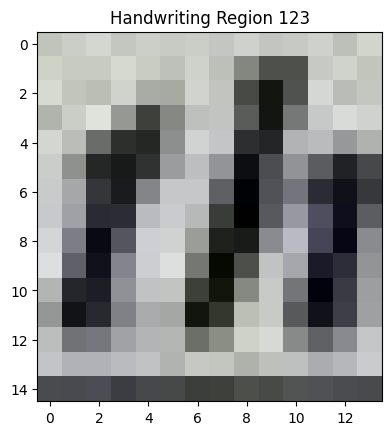

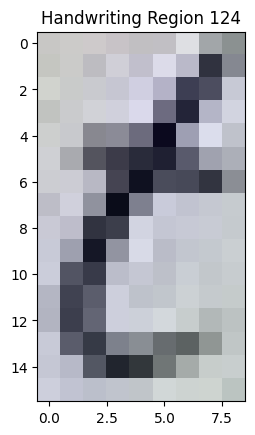

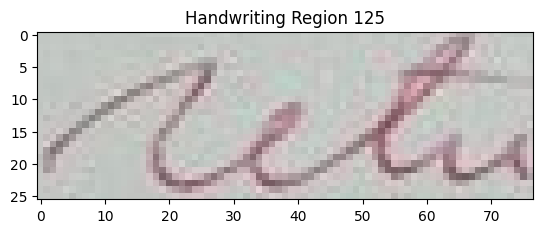

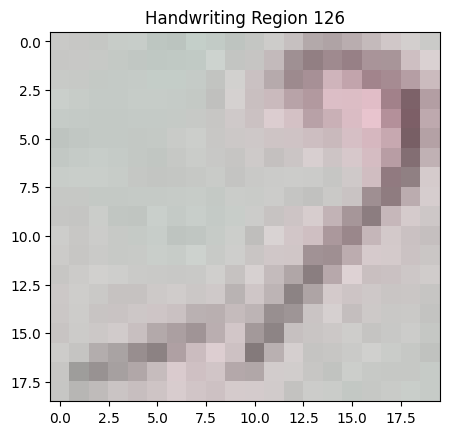

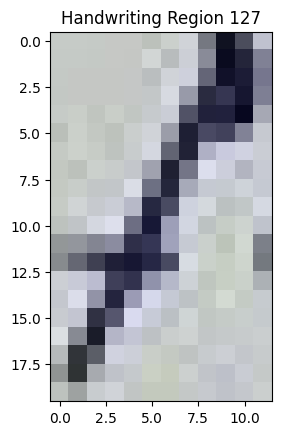

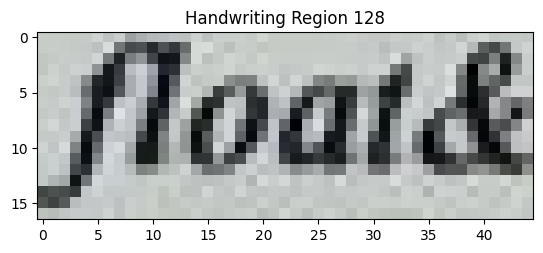

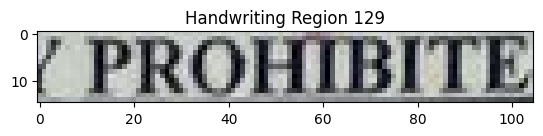

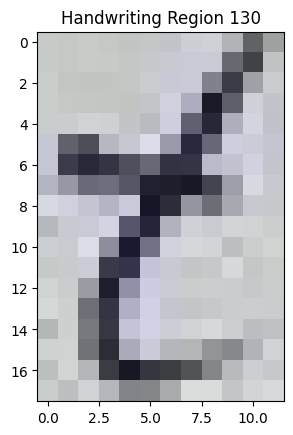

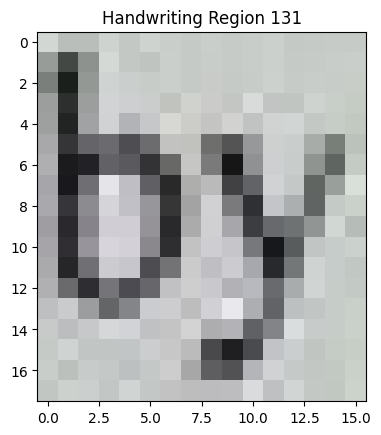

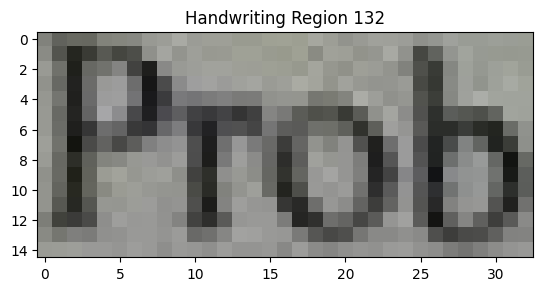

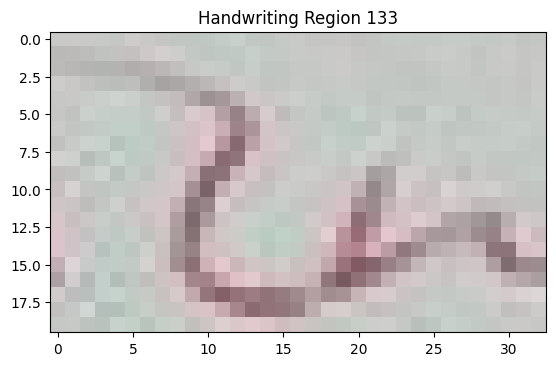

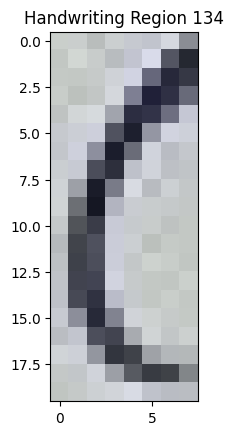

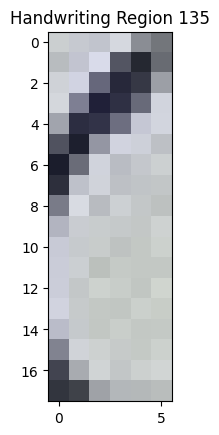

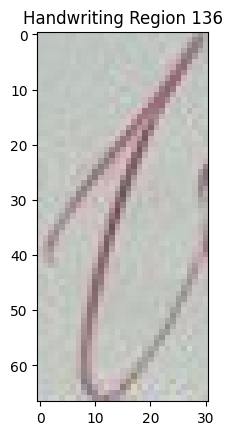

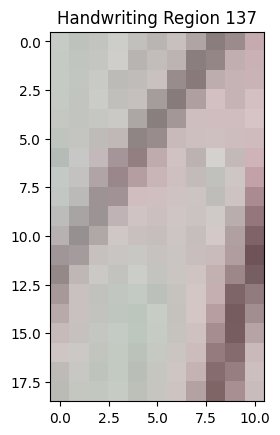

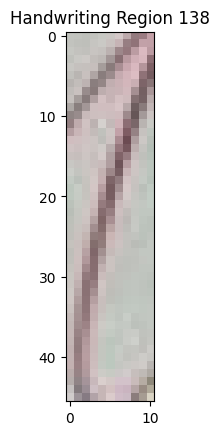

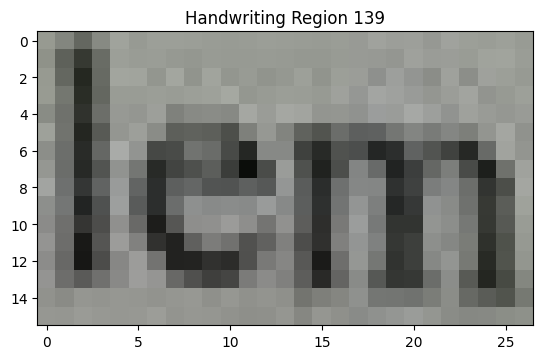

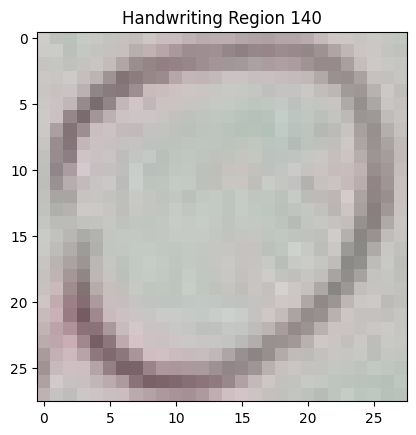

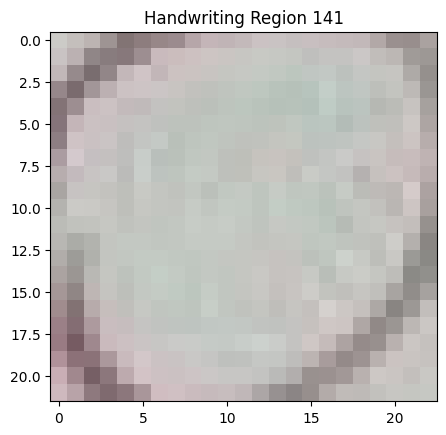

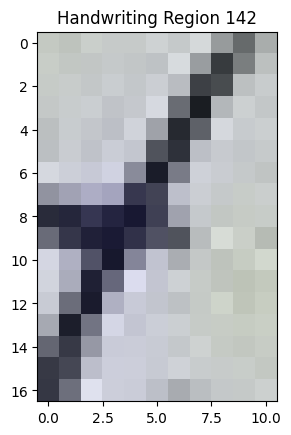

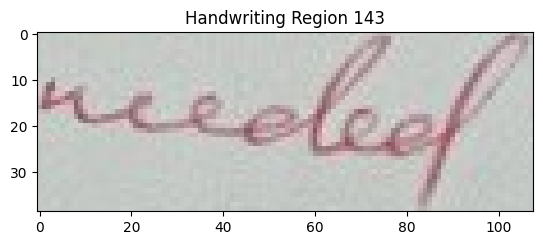

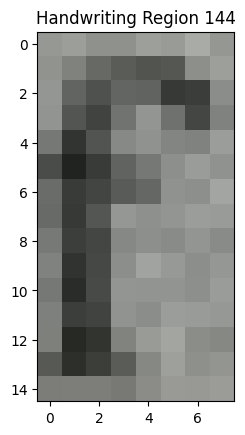

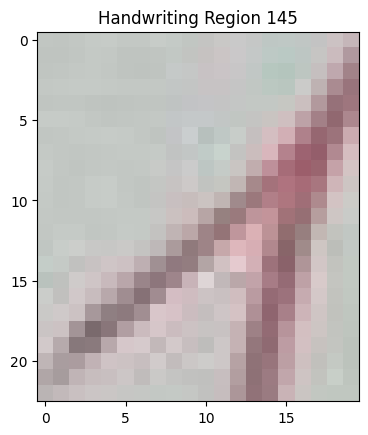

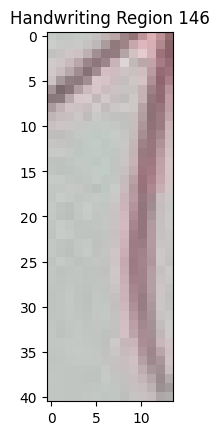

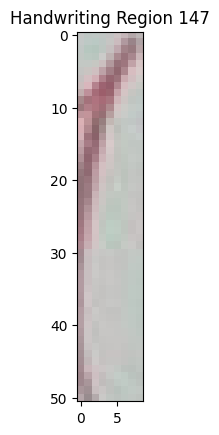

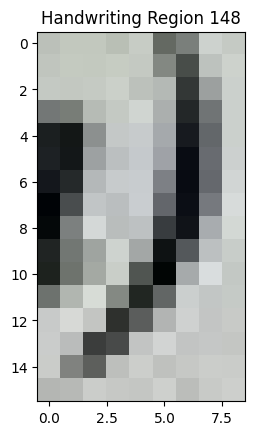

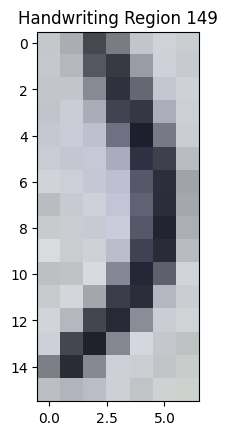

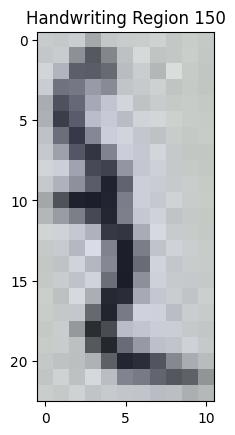

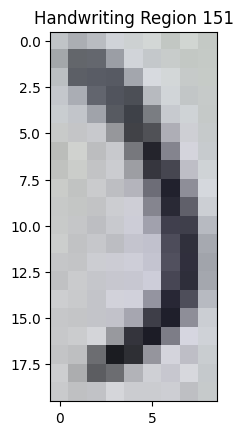

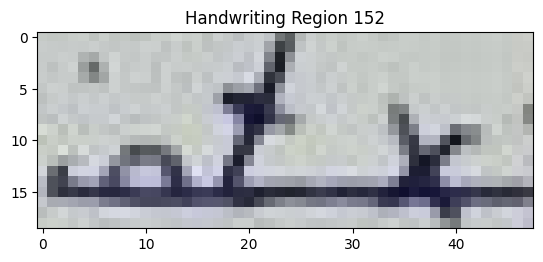

In [9]:
import cv2
import numpy as np
import imutils
from matplotlib import pyplot as plt

# Convert BGR to RGB for plotting with matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Blur the image to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Perform edge detection
edged = cv2.Canny(blurred, 30, 150)

# Find contours in the edge map and sort them from left to right
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
# cnts = sort_contours(cnts, method="left-to-right")[0]

# Initialize the list of contour bounding boxes
handwriting_contours = []

# Loop over the contours
for c in cnts:
    # Compute the bounding box of the contour
    (x, y, w, h) = cv2.boundingRect(c)

    # Filter out bounding boxes, ensuring they are neither too small nor too large
    if (w >= 5 and w <= 150) and (h >= 15 and h <= 120):
        # Append the bounding box coordinates to the list
        handwriting_contours.append((x, y, w, h))

# Crop the region where handwriting is detected
if handwriting_contours:
    img_with_rectangles = img.copy()
    for (x, y, w, h) in handwriting_contours:
        cv2.rectangle(img_with_rectangles, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the result with rectangles indicating handwriting regions
    plt.imshow(cv2.cvtColor(img_with_rectangles, cv2.COLOR_BGR2RGB))
    plt.title('Image with Handwriting Detection')
    plt.show()

    # Crop the handwriting regions
    for i, (x, y, w, h) in enumerate(handwriting_contours):
        cropped_region = img[y:y + h, x:x + w]
        plt.imshow(cv2.cvtColor(cropped_region, cv2.COLOR_BGR2RGB))
        plt.title(f'Handwriting Region {i + 1}')
        plt.show()
else:
    print("No handwriting found in the image.")


Here although the algorithm works with errors, we can get overall image of the dimensions for handwriting letters 

# Handwriting Image Processing - Conclusion

## 1. Image Cropping
- The initial step involved cropping the original image to isolate the handwriting part, crucial for focused analysis and processing.

## 2. Red Marks Removal
- Successfully removed red marks from the image, enhancing the clarity of the handwriting and preparing it for further analysis.

## 3. Evaluation of Page Features
- Evaluated page features, considering aspects such as size, orientation, and the presence of printed text. Provides insights into the overall structure of the page.

## 4. Finding Straight Lines in Handwriting
- Applied the Hough Transform to detect straight lines or segments within the cropped binary handwriting samples. Valuable for understanding baseline, slant, and other characteristics.

## 5. Detecting Binary Regions
- Applied morphological filters to construct convenient binary regions in the cropped handwriting samples. Essential for subsequent analyses and separation of characters and features.

## 6. Character and Keyword Separation
- Used contours to separate characters and keywords based on specific criteria such as aspect ratio and area. Contributes to the identification of individual elements within the handwriting.

## 7. Skeletonization
- Employed skeletonization to detect baselines in the handwriting. Simplifies the representation of shapes, aiding in the analysis of letter structure and label readability.

## 8. Analysis for Machine Learning
- Collected results, including characteristics of handwriting letters, width, height, and the presence of specific features, serve as a foundation for future machine learning applications.

## 9. Potential Impact on Performance
- The identified characteristics can be utilized to analyze how different aspects of handwriting may impact the performance of machine learning models. Lays the groundwork for understanding the relationship between handwriting features and model accuracy.

## 10. Future Applications
- The insights gained from this analysis pave the way for future applications, including the development of machine learning models for handwriting recognition, understanding writing styles, and exploring the impact of individual characteristics on model performance.

In conclusion, the systematic processing and analysis of handwritten documents provide valuable information that can be leveraged for advanced studies in handwriting recognition and related machine learning applications. The step-by-step approach ensures a thorough understanding of different aspects of handwriting, enabling informed decisions for further research and development.


References

Khalwadekar, A. (2021, December 13). Building OCR and Handwriting Recognition for document images. Medium. https://medium.com/@ajinkya.khalwadekar/building-ocr-and-handwriting-recognition-for-document-images-f7630ee95d46


Extract Handwriting and Print from Background - OpenCV Q&A Forum. (n.d.). https://answers.opencv.org/question/220762/extract-handwriting-and-print-from-background/

